## Machine learning in julia
### Importing and Using pakages

In [26]:
using Pkg
Pkg.add("MLBase")

   Resolving package versions...
  No Changes to `C:\Users\SIDDHESH\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\SIDDHESH\.julia\environments\v1.7\Manifest.toml`


In [27]:
using DataFrames, CSV
using MLBase
using Plots
using DecisionTree
using Distances
using Random
using LinearAlgebra
using DataStructures

### Reading Data File

In [28]:
df = CSV.read("iris.csv",DataFrame, normalizenames = true); # reading data file 

- First Five rows of dataset

In [29]:
df[1:5,:] 

,Column1,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,setosa
2,2,4.9,3.0,1.4,0.2,setosa
3,3,4.7,3.2,1.3,0.2,setosa
4,4,4.6,3.1,1.5,0.2,setosa
5,5,5.0,3.6,1.4,0.2,setosa


- Shape of Data or size

In [30]:
size(df)

(150, 6)

- Unique values in Species

In [31]:
unique(df.Species)

3-element Vector{String15}:
 "setosa"
 "versicolor"
 "virginica"

- Descriptive statistical values
    - Null vales are also displayed here  (nmissing)

In [32]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,75.5,1,75.5,150,0,Int64
2,Sepal_Length,5.84333,4.3,5.8,7.9,0,Float64
3,Sepal_Width,3.05733,2.0,3.0,4.4,0,Float64
4,Petal_Length,3.758,1.0,4.35,6.9,0,Float64
5,Petal_Width,1.19933,0.1,1.3,2.5,0,Float64
6,Species,,setosa,,virginica,0,String15


### Visualization
- Histogram
- Pie chart

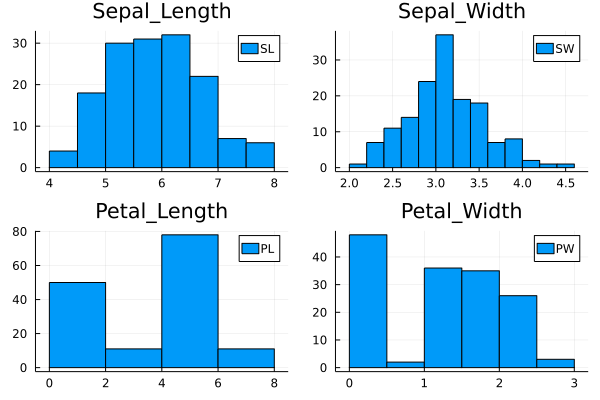

In [33]:
p1 = histogram(df.Sepal_Length, title="Sepal_Length", label="SL")
p2 = histogram(df.Sepal_Width, title="Sepal_Width", label="SW")
p3 = histogram(df.Petal_Length, title="Petal_Length", label="PL")
p4 = histogram(df.Petal_Width, title="Petal_Width", label="PW")

plot(p1,p2,p3,p4, layout=(2,2))

In [34]:
x= countmap(df.Species)
print(x)

Dict{String15, Int64}("virginica" => 50, "setosa" => 50, "versicolor" => 50)

In [35]:
a= ["virginica", "setosa", "versicolor"]
b= [50, 50, 50]

3-element Vector{Int64}:
 50
 50
 50

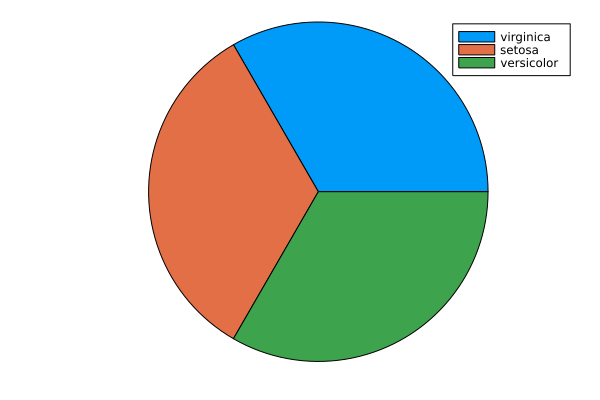

In [36]:
Plots.gr()
pie(a,b)

- Count of each class

In [37]:
countmap(df.Species) # as thing as pie chart

Dict{String15, Int64} with 3 entries:
  "virginica"  => 50
  "setosa"     => 50
  "versicolor" => 50

### Splitting data 
- Train and test

In [38]:
X = Matrix(df[:,1:4])

150×4 Matrix{Float64}:
   1.0  5.1  3.5  1.4
   2.0  4.9  3.0  1.4
   3.0  4.7  3.2  1.3
   4.0  4.6  3.1  1.5
   5.0  5.0  3.6  1.4
   6.0  5.4  3.9  1.7
   7.0  4.6  3.4  1.4
   8.0  5.0  3.4  1.5
   9.0  4.4  2.9  1.4
  10.0  4.9  3.1  1.5
  11.0  5.4  3.7  1.5
  12.0  4.8  3.4  1.6
  13.0  4.8  3.0  1.4
   ⋮              
 139.0  6.0  3.0  4.8
 140.0  6.9  3.1  5.4
 141.0  6.7  3.1  5.6
 142.0  6.9  3.1  5.1
 143.0  5.8  2.7  5.1
 144.0  6.8  3.2  5.9
 145.0  6.7  3.3  5.7
 146.0  6.7  3.0  5.2
 147.0  6.3  2.5  5.0
 148.0  6.5  3.0  5.2
 149.0  6.2  3.4  5.4
 150.0  5.9  3.0  5.1

In [39]:
irislabels = df.Species

150-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

#### Label Encoding 
- Species 

In [40]:
irislabelsmap = labelmap(irislabels)

LabelMap (with 3 labels):
[1] setosa
[2] versicolor
[3] virginica


In [41]:
y = labelencode(irislabelsmap, irislabels)

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3

- Splitting Data Function
- randsubseq same as random in python

In [42]:
function perclass_splits(y,at)
    uids = unique(y)
    keepids = []
    for ui in uids
        curids = findall(y.==ui)
        rowids = randsubseq(curids, at) 
        push!(keepids,rowids...)
    end
    return keepids
end

perclass_splits (generic function with 1 method)

In [43]:
trainids = perclass_splits(y,0.7)
testids = setdiff(1:length(y),trainids)

37-element Vector{Int64}:
   1
   2
   7
  13
  14
  19
  21
  22
  26
  27
  33
  41
  48
   ⋮
 108
 111
 112
 116
 119
 125
 128
 130
 138
 139
 142
 150

### Random Forest 

In [44]:
model = RandomForestClassifier(n_trees=20)
DecisionTree.fit!(model, X, y)

RandomForestClassifier
n_trees:             20
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             [1, 2, 3]
ensemble:            Ensemble of Decision Trees
Trees:      20
Avg Leaves: 5.3
Avg Depth:  3.45

- Accuracy 

In [45]:
findaccuracy(predictedvals,groundtruthvals) = sum(predictedvals.==groundtruthvals)/length(groundtruthvals)

findaccuracy (generic function with 1 method)

In [46]:
q = X[testids,:];
predictions_RF = DecisionTree.predict(model, q)
findaccuracy(predictions_RF,y[testids])

1.0

### Decision Tree

In [47]:
model = DecisionTreeClassifier(max_depth=2)
DecisionTree.fit!(model, X[trainids,:], y[trainids])

DecisionTreeClassifier
max_depth:                2
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [1, 2, 3]
root:                     Decision Tree
Leaves: 3
Depth:  2

- Accuracy

In [48]:
q = X[testids,:];
predictions_DT = DecisionTree.predict(model, q)
findaccuracy(predictions_DT,y[testids])

1.0